In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [2]:
dataframe = pd.read_csv('../data/okcupid.csv')


In [3]:
dataframe.head()
for keys in dataframe.keys():
    print(keys)

Unnamed: 0
age
status
sex
orientation
body_type
diet
drinks
drugs
education
ethnicity
height
income
job
last_online
location
offspring
pets
religion
sign
smokes
speaks


In [4]:
dataframe = dataframe.drop(columns='Unnamed: 0')

## Analysis of missing data from the dataset

<AxesSubplot:>

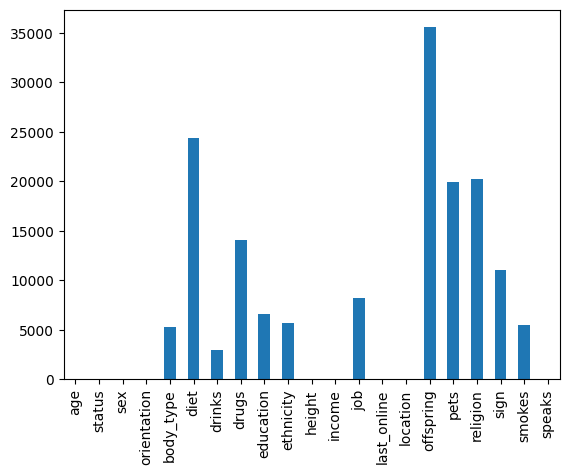

In [5]:
dataframe.isna().sum().plot(kind='bar')

This diagram shows the missing data for each attribute. Age, status, sex, orientation and location are probably mandatory if you want to register in the app, therefore there are no missing data points. 'last_online' is managed by the service itself, so there's no missing data aswell.

What is interesting is the type of data that people omit most often. The 'offspring' parameter is the one that stands out the most from the rest. It describes whether or not the person has kids or plans of having them. 

TODO: analyze the diet attribute. Group together vegetarian alike types, eat-all alike, and idk if there are other types rn. Put them together, and analyze how many are of them in % and draw some conclusions. We would use Aggregation and gather some points like this.

<AxesSubplot:xlabel='Count', ylabel='diet'>

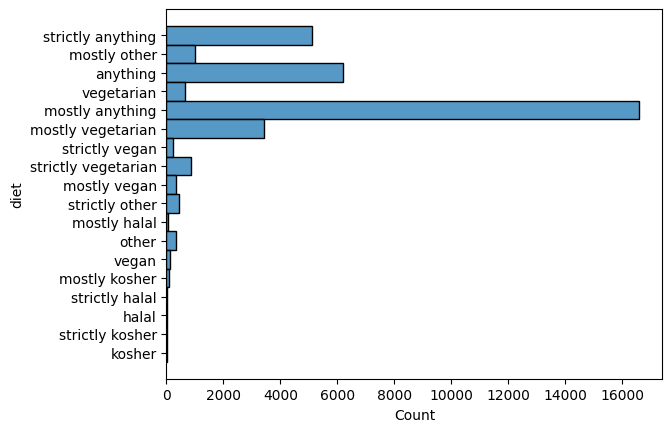

In [6]:
sns.histplot(dataframe, y = 'diet')

In [12]:
# dataframe_na = dataframe.dropna()
dataframe_na = dataframe.copy()

In [14]:
dataframe_na.fillna('MISSING', inplace =True)

In [22]:
dataframe_na['grouped_diet'] = dataframe_na['diet'].apply(lambda x : "veg" if (('vegetarian' or 'vegan') in x) 
                                                          else ("other" if ("other" in x) 
                                                                else ("anything" if ('anything' in x) 
                                                                      else ("religious" if (('halal' or 'kosher') in x) else 'missing' ))))

<AxesSubplot:xlabel='Count', ylabel='grouped_diet'>

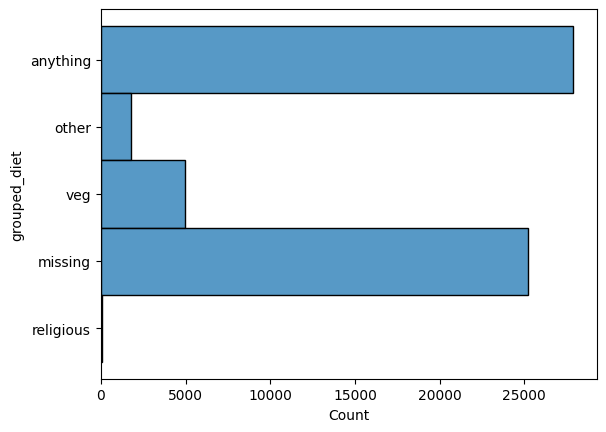

In [23]:
sns.histplot(dataframe_na, y = 'grouped_diet')